# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [121]:
%matplotlib inline
import pandas as pd

filename = "../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with seaborn until you understand each one.

In [122]:
print("dimensions %d %d" % (data.shape))
print("\ndata types")
print(data.dtypes)
print("\nNumber of empty rows per column")
print(data.apply(lambda x: sum(pd.isnull(x))))

dimensions 985 12

data types
street               object
city                 object
zip                   int64
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

Number of empty rows per column
street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64


## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

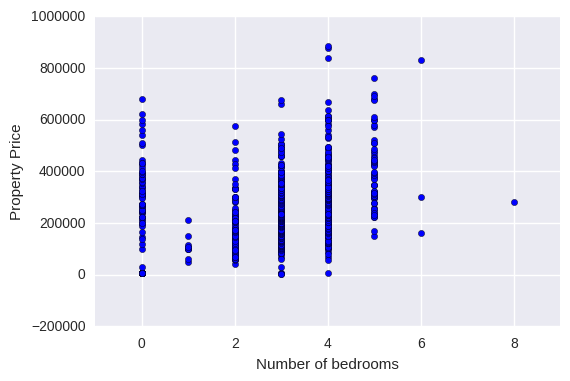

In [123]:
from matplotlib import pyplot as plt

x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Number of bedrooms")
plt.ylabel("Property Price")
plt.show()

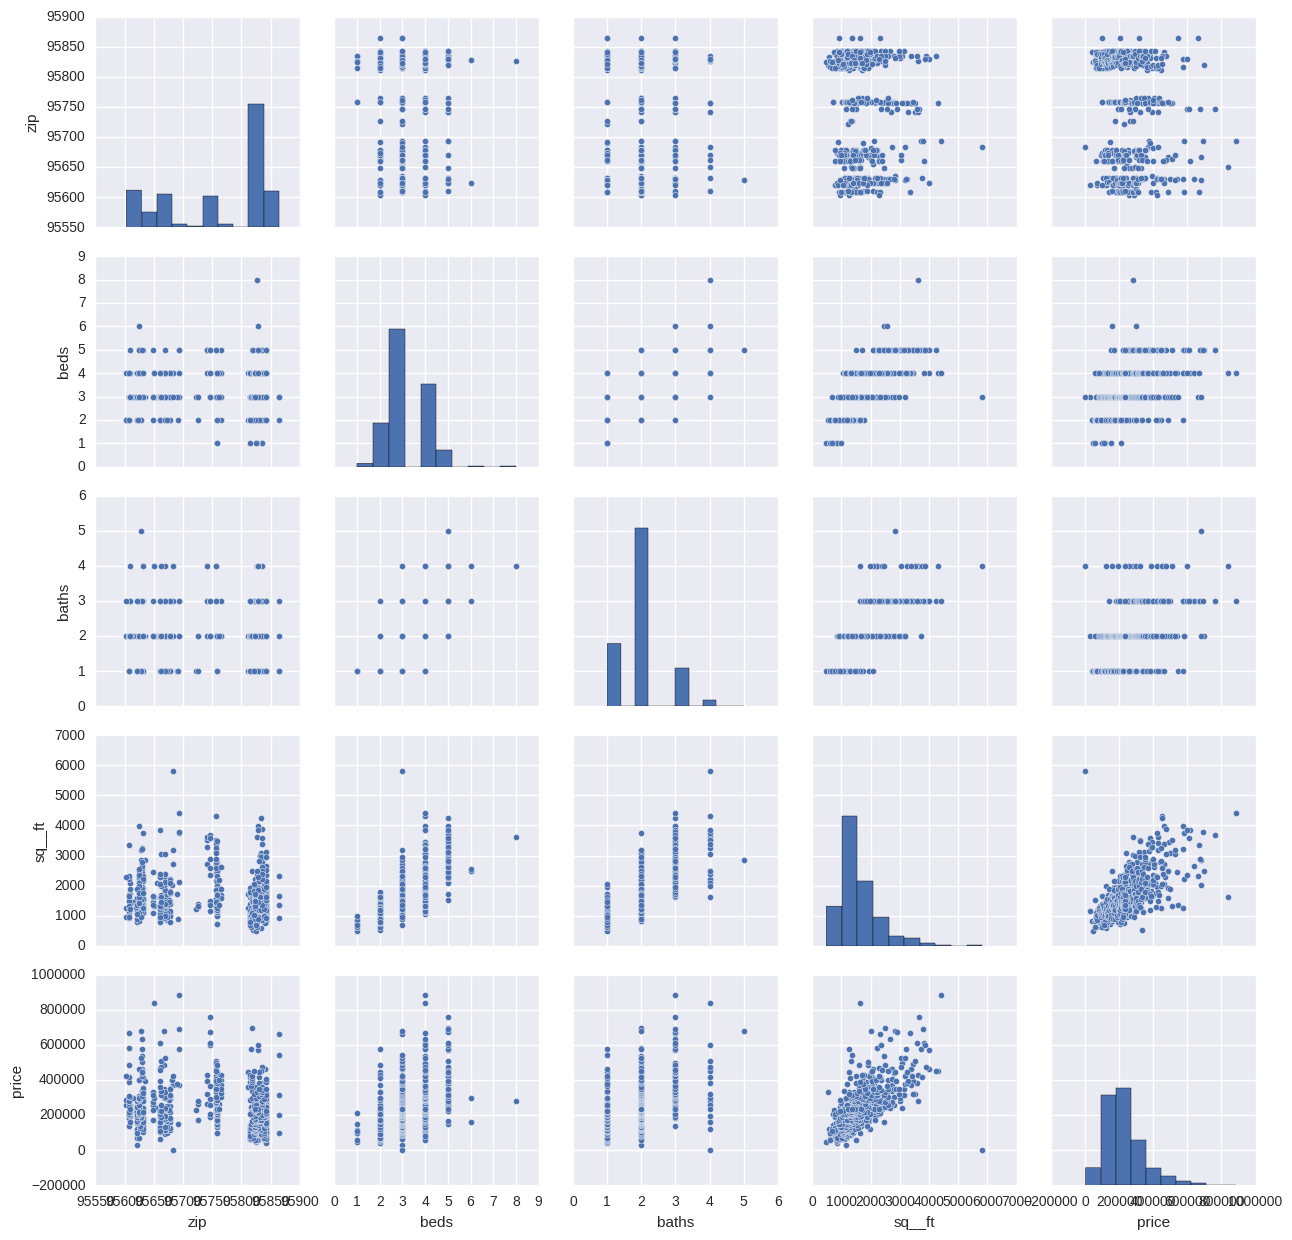

In [124]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data[data['sq__ft']>0][['zip','state','beds','baths','sq__ft','type','price']])

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

In [125]:
import patsy
import statsmodels.api as sm
from patsy import dmatrix
sub_data = data[data["sq__ft"]>0]

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     381.0
Date:                Mon, 24 Oct 2016   Prob (F-statistic):          2.15e-117
Time:                        16:52:43   Log-Likelihood:                -10404.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     811   BIC:                         2.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.04e+04   1.19e+04      4.221      0.0

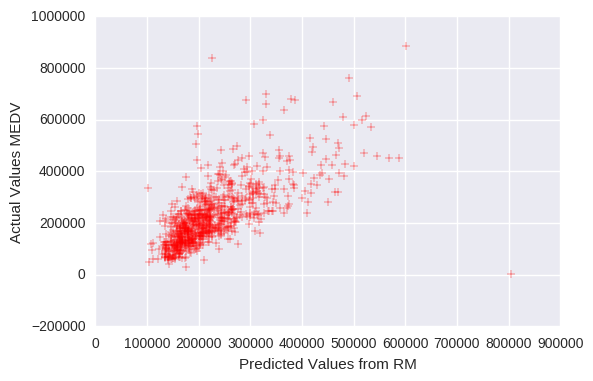

In [126]:
# First model with sq__ft and beds
y, X = patsy.dmatrices("price ~ sq__ft + beds", data=sub_data)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

plt.scatter(predictions,y,s=30,c='r',marker='+',zorder=10)
plt.xlabel('Predicted Values from RM')
plt.ylabel('Actual Values MEDV')
plt.show()

In [127]:
# Second model adding type
sub_data.head()
sub_data_type = pd.get_dummies(sub_data,columns=["type"])
sub_data_type.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'sale_date', u'price', u'latitude', u'longitude', u'type_Condo',
       u'type_Multi-Family', u'type_Residential'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     259.8
Date:                Mon, 24 Oct 2016   Prob (F-statistic):          4.43e-118
Time:                        16:52:44   Log-Likelihood:                -10399.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     810   BIC:                         2.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2.366e+04   1.47e+04  

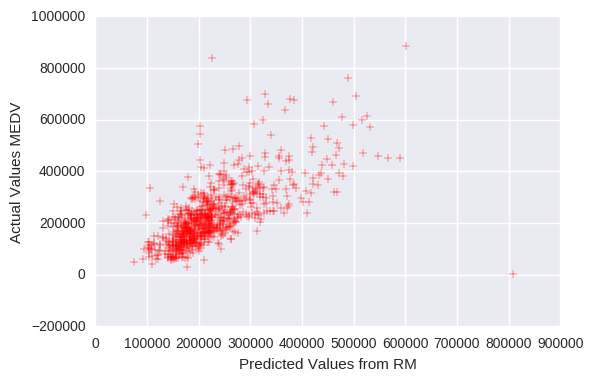

In [128]:
y, X = patsy.dmatrices("price ~ sq__ft + beds + type_Residential", data=sub_data_type)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

plt.scatter(predictions,y,s=30,c='r',marker='+',zorder=10)
plt.xlabel('Predicted Values from RM')
plt.ylabel('Actual Values MEDV')
plt.show()

In [134]:
# Third model adding zip
sub_data.head()
sub_data_type_zip = pd.get_dummies(sub_data_type,columns=["zip"],drop_first=True)
print(sub_data_type_zip.columns)
print(sub_data_type_zip.shape)

Index([u'street', u'city', u'state', u'beds', u'baths', u'sq__ft',
       u'sale_date', u'price', u'latitude', u'longitude', u'type_Condo',
       u'type_Multi-Family', u'type_Residential', u'zip_95608', u'zip_95610',
       u'zip_95614', u'zip_95619', u'zip_95621', u'zip_95623', u'zip_95624',
       u'zip_95626', u'zip_95628', u'zip_95630', u'zip_95632', u'zip_95635',
       u'zip_95648', u'zip_95650', u'zip_95655', u'zip_95660', u'zip_95661',
       u'zip_95662', u'zip_95663', u'zip_95667', u'zip_95670', u'zip_95673',
       u'zip_95677', u'zip_95678', u'zip_95682', u'zip_95683', u'zip_95690',
       u'zip_95691', u'zip_95693', u'zip_95722', u'zip_95726', u'zip_95742',
       u'zip_95746', u'zip_95747', u'zip_95757', u'zip_95758', u'zip_95762',
       u'zip_95765', u'zip_95811', u'zip_95814', u'zip_95815', u'zip_95816',
       u'zip_95817', u'zip_95818', u'zip_95819', u'zip_95820', u'zip_95821',
       u'zip_95822', u'zip_95823', u'zip_95824', u'zip_95825', u'zip_95826',
       u'zip

In [135]:
sub_data_type_zip.drop(labels=["street","city","state","sale_date","price","latitude","longitude"],axis=1,inplace=True)

In [136]:
sub_data_type_zip.head()

,beds,baths,sq__ft,type_Condo,type_Multi-Family,type_Residential,zip_95608,zip_95610,zip_95614,zip_95619,...,zip_95831,zip_95832,zip_95833,zip_95834,zip_95835,zip_95838,zip_95841,zip_95842,zip_95843,zip_95864
0,2,1,836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,1,1167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,797,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
print(sub_data["price"].shape)
print(sub_data_type_zip.dtypes)

(814,)
beds                   int64
baths                  int64
sq__ft                 int64
type_Condo           float64
type_Multi-Family    float64
type_Residential     float64
zip_95608            float64
zip_95610            float64
zip_95614            float64
zip_95619            float64
zip_95621            float64
zip_95623            float64
zip_95624            float64
zip_95626            float64
zip_95628            float64
zip_95630            float64
zip_95632            float64
zip_95635            float64
zip_95648            float64
zip_95650            float64
zip_95655            float64
zip_95660            float64
zip_95661            float64
zip_95662            float64
zip_95663            float64
zip_95667            float64
zip_95670            float64
zip_95673            float64
zip_95677            float64
zip_95678            float64
                      ...   
zip_95758            float64
zip_95762            float64
zip_95765            float64
zip_958

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     27.04
Date:                Mon, 24 Oct 2016   Prob (F-statistic):          2.64e-160
Time:                        16:54:44   Log-Likelihood:                -10158.
No. Observations:                 814   AIC:                         2.046e+04
Df Residuals:                     743   BIC:                         2.079e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
beds              -6436.3954   4608.46

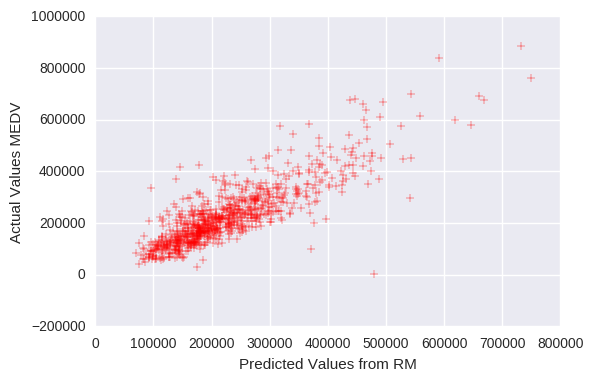

In [139]:
model = sm.OLS(sub_data["price"], sub_data_type_zip).fit()
predictions = model.predict(sub_data_type_zip)
print(model.summary())

plt.scatter(predictions,y,s=30,c='r',marker='+',zorder=10)
plt.xlabel('Predicted Values from RM')
plt.ylabel('Actual Values MEDV')
plt.show()

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?